In [1]:
import matplotlib.pyplot as plt  
import numpy as np 
from sklearn import datasets
import time
from sklearn import metrics
import matplotlib as mpl
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [2]:
iris = datasets.load_iris() 
X = iris.data[:, :4]  
Y = iris.target
print(X.shape)

(150, 4)


In [3]:
## 定義基本函數
def get_HT(X,Y,label_pred,name='k_means'):
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False 
    
    x0 = X[label_pred == 0]
    x1 = X[label_pred == 1]
    x2 = X[label_pred == 2]
    plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='簇1')  
    plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='簇2')  
    plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='簇3')  
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width')  
    plt.legend(loc=2)  
    plt.title(name + "聚类结果")
    plt.show()
    
    sum = 0

In [4]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
c:\Users\d1032\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\d1032\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\d1032\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\d1032\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont:

K-means分群時間: 0.051037399999998456 秒


c:\Users\d1032\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31751 (\N{CJK UNIFIED IDEOGRAPH-7C07}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


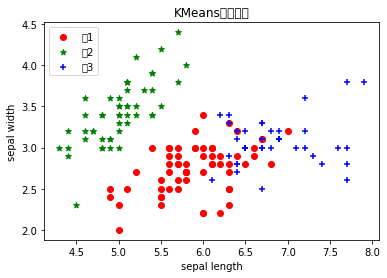

0.8933333333333333

In [5]:
#Kmeans算法
from sklearn.cluster import KMeans
t1 = time.perf_counter()
estimator = KMeans(n_clusters=3,max_iter = 200)  
estimator.fit(X)  
t2 = time.perf_counter()

print("K-means分群時間:", t2-t1, "秒")

label_pred = estimator.labels_  
get_HT(X,Y = Y,label_pred = label_pred,name = 'KMeans')

purity_score(Y, label_pred)

In [6]:
iris=datasets.load_iris()
X=iris.data
X=X[:,2:4]

階層式分群時間: 0.0007295999999996639 秒


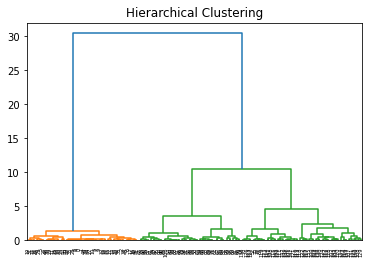

0.96

In [9]:
#階層式分群
t1 = time.perf_counter()
dis=sch.linkage(X,metric='euclidean',method='ward')
clusters = sch.fcluster(dis, 3, criterion="maxclust")
t2 = time.perf_counter()

print("階層式分群時間:", t2-t1, "秒")

sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

purity_score(Y, clusters)

BSCAN分群時間: 0.04369069999999908 秒


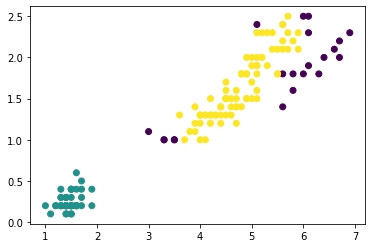

In [10]:
t1 = time.perf_counter()
clustering=DBSCAN(eps=0.3,min_samples=10).fit(X)
plt.scatter(X[:,0],X[:,1],c=clustering.labels_)
purity_score(Y, clustering.labels_)
t2 = time.perf_counter()
print("BSCAN分群時間:", t2-t1, "秒")